In [6]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the CPU Usage of Broker-1
df1b = pd.read_csv("Brok1cpu_usage.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-07-31 14:50:45,320.983627,my-cluster-metrics-kafka-0
1,2021-07-31 14:51:01,324.617688,my-cluster-metrics-kafka-0
2,2021-07-31 14:51:12,325.724630,my-cluster-metrics-kafka-0


In [7]:
#Average CPU Usage before rebalancing
cpubr1 = df1b[(df1b['timestamp'] >= '2021-07-31 14:50:45') & (df1b['timestamp'] <= '2021-07-31 15:17:11')]
cpubr1.head(3)
cpubr1avg = cpubr1['values'].mean()
print(cpubr1avg)
cpubr1.describe()

441.5958135704762


,values
count,105.000000
mean,441.595814
std,69.975869
min,320.983627
25%,384.467304
50%,440.596492
75%,495.849942
max,565.766090


In [8]:
#Average CPU Usage During rebalancing
cpudr1 = df1b[(df1b['timestamp'] >= '2021-07-31 15:17:29') & (df1b['timestamp'] <= '2021-07-31 15:28:11')]
cpudr1.head(3)
cpudr1avg = cpudr1['values'].mean()
print(cpudr1avg)
cpudr1.describe()

619.5151270666665


,values
count,45.000000
mean,619.515127
std,30.010880
min,568.835562
25%,596.712852
50%,618.246964
75%,643.729063
max,670.985451


In [9]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1cpu = ttest_ind(cpudr1['values'], cpubr1['values'])
print(resb1cpu)

Ttest_indResult(statistic=16.397269664370885, pvalue=4.2560779630497515e-35)


In [10]:
cpubr1.drop(['pod'], axis=1, inplace=True)
cpubr1.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  105 non-null    datetime64[ns]
 1   values     105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
cpudr1.drop(['pod'], axis=1, inplace=True)
cpudr1.head(10)
cpudr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 105 to 149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  45 non-null     datetime64[ns]
 1   values     45 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Broker1 CPU Usage')

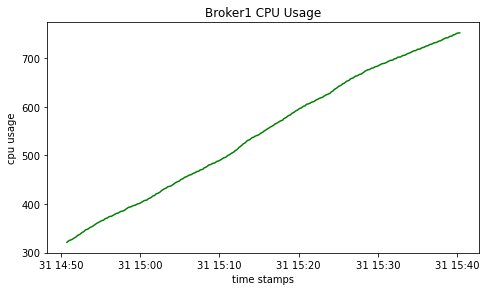

In [12]:
from datetime import datetime
#CPU Usage for the entire load test
c1=[]
for dat in df1b.timestamp:
    # print (dat)
    c1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(c1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('cpu usage')
axe1.set_title('Broker1 CPU Usage')
#fig1.tight_layout()

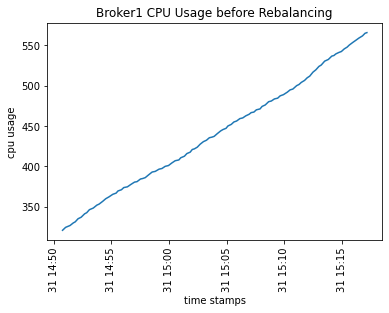

In [13]:
#CPU Usage before rebalancing
b1=[]
for dat in cpubr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,cpubr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage before Rebalancing')
plt.show()

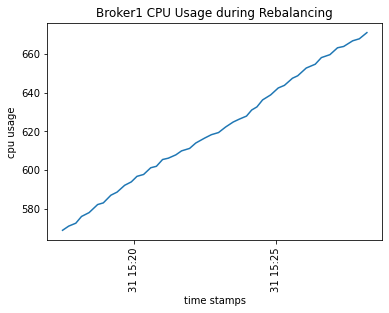

In [14]:
#CPU Usage during rebalancing
d1=[]
for dat in cpudr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,cpudr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage during Rebalancing')
plt.show()

In [23]:
# DA on the CPU Usage of Broker-2
df2b = pd.read_csv("Brok2cpu_usage.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-07-31 14:50:03,306.712625,my-cluster-metrics-kafka-1
1,2021-07-31 14:50:21,310.923482,my-cluster-metrics-kafka-1
2,2021-07-31 14:50:36,312.546533,my-cluster-metrics-kafka-1


In [24]:
#Average CPU Usage before rebalancing
cpubr2 = df2b[(df1b['timestamp'] >= '2021-07-31 14:50:03') & (df2b['timestamp'] <= '2021-07-31 15:17:13')]
cpubr2.head(3)
cpubr2avg = cpubr2['values'].mean()
print(cpubr2avg)
cpubr2.describe()

427.0034128681819


,values
count,110.000000
mean,427.003413
std,70.419504
min,306.712625
25%,368.415876
50%,424.220552
75%,482.732695
max,559.001559


In [25]:
#Average CPU Usage During rebalancing
cpudr2 = df2b[(df2b['timestamp'] >= '2021-07-31 15:17:28') & (df2b['timestamp'] <= '2021-07-31 15:28:15')]
cpudr2.head(3)
cpudr2avg = cpudr2['values'].mean()
print(cpudr2avg)
cpudr2.describe()

608.6566018066667


,values
count,45.000000
mean,608.656602
std,28.414000
min,560.222337
25%,585.910526
50%,607.781790
75%,632.006939
max,658.159477


In [26]:
#T-Stats Analysis
resb2cpu = ttest_ind(cpudr2['values'], cpubr2['values'])
print(resb2cpu)

Ttest_indResult(statistic=16.730059744306846, pvalue=2.2268735224699947e-36)


In [27]:
cpubr2.drop(['pod'], axis=1, inplace=True)
cpubr2.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  105 non-null    datetime64[ns]
 1   values     105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
cpudr2.drop(['pod'], axis=1, inplace=True)
cpudr2.head(10)
cpudr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 110 to 154
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  45 non-null     datetime64[ns]
 1   values     45 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Broker2 CPU Usage')

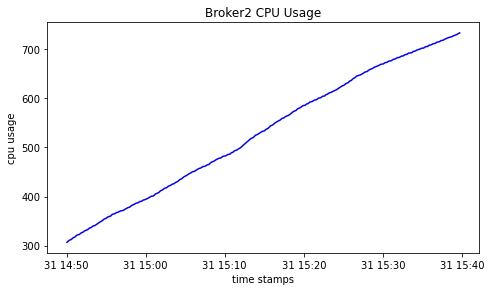

In [29]:
from datetime import datetime
#CPU Usage for the entire load test
c2=[]
for dat in df2b.timestamp:
    # print (dat)
    c2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(c2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('cpu usage')
axe2.set_title('Broker2 CPU Usage')
#fig1.tight_layout()

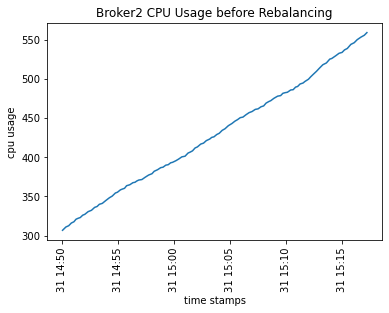

In [30]:
#CPU Usage before rebalancing
b2=[]
for dat in cpubr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,cpubr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage before Rebalancing')
plt.show()

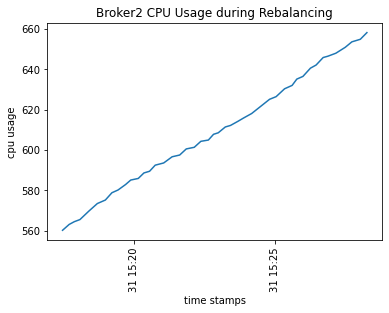

In [31]:
#CPU Usage during rebalancing
d2=[]
for dat in cpudr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,cpudr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage during Rebalancing')
plt.show()

In [36]:
# DA on the CPU Usage of Broker-3
df3b = pd.read_csv("Brok3cpu_usage.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-07-31 14:49:21,290.965021,my-cluster-metrics-kafka-2
1,2021-07-31 14:49:31,292.043757,my-cluster-metrics-kafka-2
2,2021-07-31 14:49:44,295.186046,my-cluster-metrics-kafka-2


In [37]:
#Average CPU Usage before rebalancing
cpubr3 = df3b[(df3b['timestamp'] >= '2021-07-31 14:49:21') & (df3b['timestamp'] <= '2021-07-31 15:17:13')]
cpubr3.head(3)
cpubr3avg = cpubr3['values'].mean()
print(cpubr3avg)
cpubr3.describe()

410.6763041577983


,values
count,109.000000
mean,410.676304
std,69.840556
min,290.965021
25%,352.146340
50%,410.514040
75%,466.360679
max,534.240388


In [38]:
#Average CPU Usage During rebalancing
cpudr3 = df3b[(df3b['timestamp'] >= '2021-07-31 15:17:28') & (df3b['timestamp'] <= '2021-07-31 15:28:16')]
cpudr3.head(3)
cpudr3avg = cpudr3['values'].mean()
print(cpudr3avg)
cpudr3.describe()

583.6071646704545


,values
count,44.000000
mean,583.607165
std,26.350443
min,536.146332
25%,563.384597
50%,582.071949
75%,605.090990
max,629.214572


In [39]:
#T-Stats Analysis
resb3cpu = ttest_ind(cpudr3['values'], cpubr3['values'])
print(resb1cpu)

Ttest_indResult(statistic=16.397269664370885, pvalue=4.2560779630497515e-35)


In [40]:
cpubr3.drop(['pod'], axis=1, inplace=True)
cpubr3.head(10)
cpubr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  109 non-null    datetime64[ns]
 1   values     109 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
cpudr3.drop(['pod'], axis=1, inplace=True)
cpudr3.head(10)
cpudr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 109 to 152
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  44 non-null     datetime64[ns]
 1   values     44 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


Text(0.5, 1.0, 'Broker3 CPU Usage')

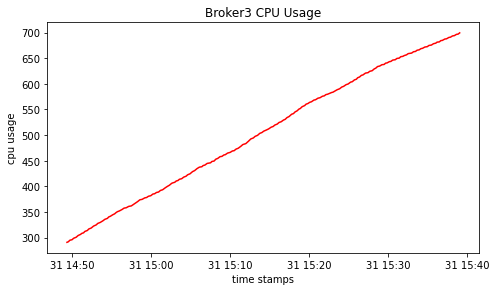

In [42]:
from datetime import datetime
#CPU Usage for the entire load test
c3=[]
for dat in df3b.timestamp:
    # print (dat)
    c3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(c3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('cpu usage')
axe3.set_title('Broker3 CPU Usage')
#fig1.tight_layout()

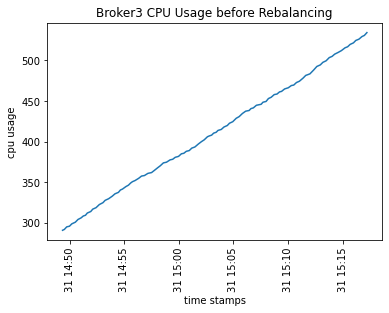

In [43]:
#CPU Usage before rebalancing
b3=[]
for dat in cpubr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,cpubr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage before Rebalancing')
plt.show()

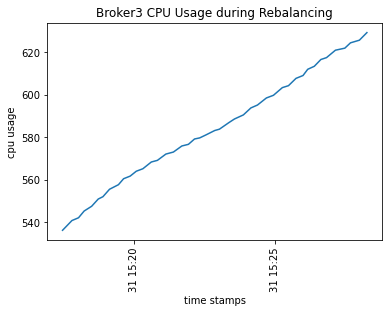

In [44]:
#CPU Usage during rebalancing
d3=[]
for dat in cpudr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,cpudr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage during Rebalancing')
plt.show()